In [1]:
from PIL import Image
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

In [2]:
AUTOTUNE = tf.data.AUTOTUNE

data_dir = "/home/jupyter-naturident/Untitled Folder/data/classif_dataset_C_RL"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle = True,
  image_size=(640, 1280),
  batch_size=1)

class_names = train_ds.class_names
print(class_names)
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.take(160)
train_ds = train_ds.skip(160)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(640, 1280),
  batch_size=1)
print("Training samples "+str(train_ds.cardinality().numpy()))
print("validation samples "+str(val_ds.cardinality().numpy()))
print("test samples "+str(test_ds.cardinality().numpy()))
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2008 files belonging to 2 classes.
Using 1607 files for training.
['C', 'RL']
Found 2008 files belonging to 2 classes.
Using 401 files for validation.
Training samples 1447
validation samples 160
test samples 401


In [3]:
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(640, 1280, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 640, 1280, 3)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 640, 1280, 16)     448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 320, 640, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 640, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 320, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 320, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 160, 64)       0

-Train, save, plot losses for the classifier to classify C, RL pallet block images

*** RUN only to retrain ***

Epoch 1/7
1447/1447 [==============================] - 38s 17ms/step - loss: 2.7416 - accuracy: 0.7964 - val_loss: 0.3078 - val_accuracy: 0.9062
Epoch 2/7
1447/1447 [==============================] - 21s 14ms/step - loss: 0.2012 - accuracy: 0.9360 - val_loss: 0.4587 - val_accuracy: 0.9062
Epoch 3/7
1447/1447 [==============================] - 22s 15ms/step - loss: 0.1258 - accuracy: 0.9633 - val_loss: 0.3613 - val_accuracy: 0.9312
Epoch 4/7
1447/1447 [==============================] - 21s 14ms/step - loss: 0.1551 - accuracy: 0.9690 - val_loss: 0.1957 - val_accuracy: 0.9375
Epoch 5/7
1447/1447 [==============================] - 21s 14ms/step - loss: 0.1059 - accuracy: 0.9711 - val_loss: 0.1686 - val_accuracy: 0.9563
Epoch 6/7
1447/1447 [==============================] - 21s 15ms/step - loss: 0.1047 - accuracy: 0.9689 - val_loss: 0.1498 - val_accuracy: 0.9375
Epoch 7/7
1447/1447 [==============================] - 22s 15ms/step - loss: 0.0471 - accuracy: 0.9884 - val_loss: 0.2808 - val_ac

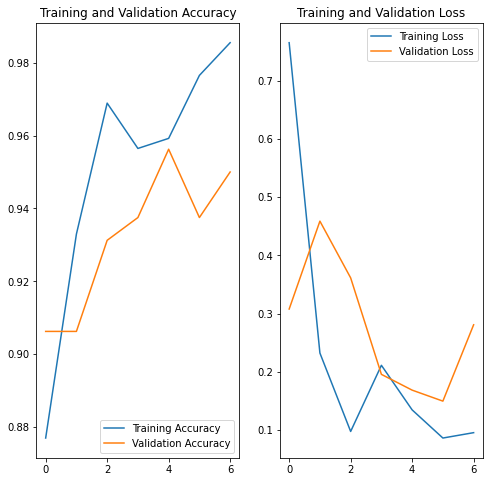

In [6]:
epochs=7
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

json = model.to_json()
with open("./model_classifier_C_RL/classif_C_RL.json", "w") as json_file:
    json_file.write(json)
model.save_weights("./model_classifier_C_RL/classif_C_RL.h5")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

-Loading weights of already trained model

In [8]:
file = open("./model_classifier_C_RL/classif_C_RL.json", 'r')
json = file.read()
file.close()
model = model_from_json(json)
model.load_weights("./model_classifier_C_RL/classif_C_RL.h5")

Applying the trained model(original-C,RL) to predict the original RL images.

In [9]:
RL_ds = test_ds.filter(lambda x,l: tf.math.equal(l[0],1))
predictions=model.predict(RL_ds)
scores = tf.nn.softmax(predictions).numpy()
predictions = [class_names[i] for i in np.argmax(scores,axis=-1)]
#scores = np.argmax(scores,axis=-1)
#scores = 100*scores

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Calculating accuracy of the Model to classify a original RL image as RL

In [10]:
actuals = ['RL']*len(predictions)
from sklearn import metrics
metrics.accuracy_score(actuals, predictions)

0.9743589743589743

In [11]:
from collections import Counter
print(Counter(predictions).keys())
Counter(predictions).values()

dict_keys(['RL', 'C'])


dict_values([190, 5])

Importing the images which are generated by the cyclegan

In [12]:
Generated_data_dir = "/home/jupyter-naturident/cycleGAN/CycleGAN-Tensorflow-2/output/pallet-block-512/samples_testing/"

Gererated_C2RL = tf.keras.preprocessing.image_dataset_from_directory(
  Generated_data_dir,
  shuffle = True,
  batch_size = 1,
  image_size=(640, 1280),
  )

Found 1906 files belonging to 2 classes.


The trained model which is trained on original images is applied on the generated images

In [13]:
Gen_RL = Gererated_C2RL.filter(lambda x,l: tf.math.equal(l[0],0))
Gen_RL = Gen_RL.take(195)
predictions_C2RL=model.predict(Gen_RL)
scores_C2RL = tf.nn.softmax(predictions_C2RL).numpy()
predictions_C2RL = [class_names[i] for i in np.argmax(scores_C2RL,axis=-1)]
#scores_C2RL = scores_C2RLnp.argmax(scores_C2RL,axis=-1)
#scores_C2RL = 100*scores_C2RL

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Calculating accuracy of the Model to classify a gererated RL image as RL

In [14]:
actuals = ['RL']*len(predictions_C2RL)
from sklearn import metrics
metrics.accuracy_score(actuals, predictions_C2RL)

0.9025641025641026

In [15]:
len(predictions_C2RL)

195

In [16]:
from collections import Counter
print(Counter(predictions_C2RL).keys())
Counter(predictions_C2RL).values()

dict_keys(['RL', 'C'])


dict_values([176, 19])